In [169]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import *
get_ipython().magic(u'matplotlib inline')

In [170]:
# 1 punto

In [171]:
#Metodo de Newton-Rhapson
def nr(f,df,pin,N):
    p=pin
    for i in xrange(0,N):
        p=p-(f(p)/df(p))
        #print p
    return p

In [172]:
#funcion
def ec(x):
    ec = np.exp(x)-x-2.0
    return ec
#derivada
def dec(x):
    dec=np.exp(x)-1.0
    return dec

In [173]:
#grafica

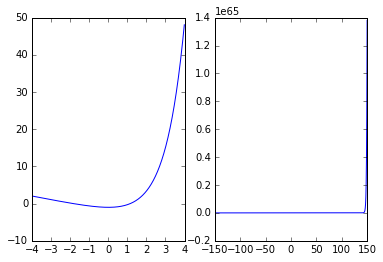

In [174]:
x=np.arange(-4,4.0,0.01)
x2=np.arange(-150,150,0.01)
plt.subplot(1,2,1)
plt.plot(x,ec(x))
plt.subplot(1,2,2)
plt.plot(x2,ec(x2))

In [175]:
#solucion a la ecuacion para la aproximacion de x<0
sol_neg=nr(ec,dec,-1.0,10)

#solucion a la ecuacion para la aproximacion de x>0
sol_pos=nr(ec,dec,1.0,10)

#confirmacion de la respuesta:
cero1=ec(sol_neg)
cero2=ec(sol_neg)

print 'La solucion negativa es: ',sol_neg
print 'La solucion positiva es: ',sol_pos
print 'Si da ceros las respuestas son correctas:',cero1,cero2

La solucion negativa es:  -1.84140566044
La solucion positiva es:  1.14619322062
Si da ceros las respuestas son correctas: 0.0 0.0


In [176]:
#si se dan como estimativos iniciales numeros mayores aunque
#la funcion debe converger se esperaria que lo haga mas lentamente
#que con valores mas aproximados a las raices reales.

#solucion a la ecuacion para la aproximacion de x=-100
sol_neg2=nr(ec,dec,-100,10)

#solucion a la ecuacion para la aproximacion de x=100
sol_pos2=nr(ec,dec,100,10)
sol_pos3=nr(ec,dec,100,105)

#confirmacion de la respuesta:
ceros1=ec(sol_neg2)
ceros2=ec(sol_neg2)

print 'La solucion negativa es:',sol_neg2, 'con 10 iteraciones'
print 'La primera solucion positiva es: ',sol_pos2,'con 10 iteraciones'
print 'La segunda solucion positiva es: ',sol_pos3,'con 105 iteraciones'

La solucion negativa es: -1.84140566044 con 10 iteraciones
La primera solucion positiva es:  90.0 con 10 iteraciones
La segunda solucion positiva es:  1.14619322062 con 105 iteraciones


In [177]:
#se ve entonces que converge rapidamente para la solucion negativa
#siendo necesario solo 10 iteraciones para obtener una muy buena 
#aproximacion pero lentamente para la positiva siendo necesarias 105
#iteraciones para llegar a una convegencia de la solucion.

In [178]:
#2 punto

In [179]:
#funcion para el volumen
def f(h):
    V_cal = L*( 0.5*np.pi*r**2 - r**2*np.arcsin(h/r) - h*(r**2-h**2)**0.5 )
    sol=-V_cal+v_dado
    return sol

In [180]:
#Datos
L=10.0       #pies
r=1.0        #pies
v_dado=12.4  #pies3

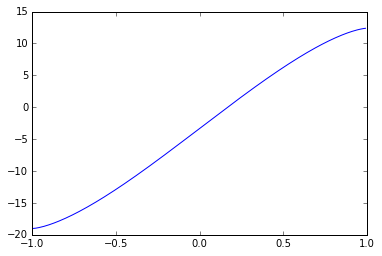

In [181]:
#grafica
x=np.arange(-r,r,0.01)
plt.plot(x,f(x))

In [182]:
#para el calculo de h se usa el metodo de biseccion:

#Metodo de biseccion
def biseccion(f,a,b,N):
    
    if f(a)*f(b)>0.0:
         print "No hay raiz en el intervalo dado"
    
    for i in xrange(1,N):
        pm=(a+b)/2.0
        
        if f(pm)*f(a)<0.0:
            b=pm
            #print pm
        if f(pm)*f(b)<0.0:
            a=pm
            #print pm
    return pm  

In [183]:
#del grafico se puede pensar que el cero de f esta entre 0 y 0.5 ft:
h=biseccion(f,0,0.5,100)
print 'La altura del agua en el recipiente es:',r-h,'ft'

La altura del agua en el recipiente es: 0.833833965342 ft


In [184]:
#3 punto

In [185]:
#parte a

In [186]:
#polinomios de Lagrange

#Coeficientes Lnk
def Ln(lx,x,k):
    mul=1.0
    for i in xrange(0,len(lx)):
        if i==k:continue
        mul=mul*(x-lx[i])/(lx[k]-lx[i])
    return mul

#suma
def lag(lx,ly,x):
    suma=0.0
    for i in xrange(0,len(lx)):
        suma = suma + ly[i]*Ln(lx,x,i)
    return suma

In [187]:
#Polinomios de Hermite

#Diferencias divididas 
#tomado de : https://github.com/sbustamante/ComputationalMethods

def Dh(Zn,Yn,Ypn,j,k):
    #If k+j>N
    if j+k >= len(Zn):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Yn[j/2]
    #First order divided difference (even indexes)
    elif k == 1 and j%2 == 0:
        return Ypn[j/2]
    #If higher divided difference
    else:
        return (Dh(j+1,k-1,Zn,Yn,Ypn)-Dh(j,k-1,Zn,Yn,Ypn))/(Zn[j+k]-Zn[j])

In [188]:
#multiplicacion para la suma
def mult(Zn,x,k):
    mult=1.0
    for i in xrange(0,k-1):
        mult=mult*(x-Z[i])
    return mult

#Suma
def Her(Zn,Yn,Ypn,x,k):
    suma=0.0
    for i in xrange(0,k-1):
        suma = suma + mult(Zn,x,i)*Dh(Zn,Yn,Ypn,0,i+1)
    return suma + Yn[0]

In [189]:
#funcion y derivada
def funcion(x):
    f = x - np.cos(x)
    return f

def dfuncion(x):
    df=1+np.sin(x)
    return df

In [200]:
#listas
lxr=lx=np.arange(-2*np.pi,2*np.pi,0.1) #para la funcion real
lx=np.arange(-2*np.pi,2*np.pi,1)       #para la aproximacion
lx2=np.arange(-2*np.pi,2*np.pi,3)    #para la aproximacion 2 
ly=funcion(lx)
lyp=dfuncion(lx)
print len(lx)
print len(lx2)
#print ly
#print lx
#print lyp

13
5


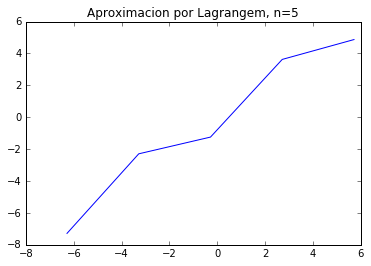

In [201]:
#apoximacion por lagrange con 5 puntos
plt.plot(lx2,lag(lx,ly,lx2))
plt.title('Aproximacion por Lagrangem, n=5')

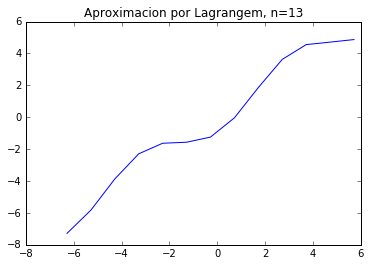

In [202]:
#apoximacion por lagrange con 13 puntos
plt.plot(lx,lag(lx,ly,lx))
plt.title('Aproximacion por Lagrangem, n=13')

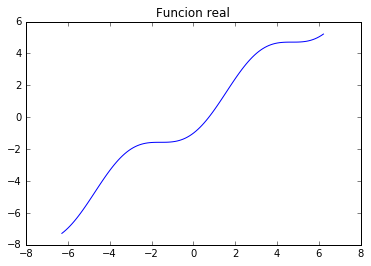

In [203]:
#funcion real
plt.plot(lxr,funcion(lxr))
plt.title('Funcion real')

In [204]:
#aproximacion por Hermite
#plt.plot(lx,Her(lx,ly,lyp,lx,126))

In [205]:
#parte b

In [206]:
#polinomios de Lagrange arreglado para cambiar el grado del polinomio

#Coeficientes Lnk
def Ln_arr(lx,x,k):
    mul=1.0
    for i in xrange(0,len(lx)):
        if i==k:continue
        mul=mul*(x-lx[i])/(lx[k]-lx[i])
    return mul

#suma
def lag_arr(lx,ly,n,x):
    suma=0.0
    for i in xrange(0,n):
        suma = suma + ly[i]*Ln_arr(lx,x,i)
    return suma

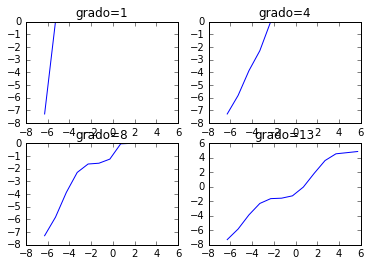

In [207]:
#graficas
plt.subplot(2,2,1)
plt.plot(lx,lag_arr(lx,ly,1,lx))
plt.title('grado=1')

plt.subplot(2,2,2)
plt.plot(lx,lag_arr(lx,ly,4,lx))
plt.title('grado=4')

plt.subplot(2,2,3)
plt.plot(lx,lag_arr(lx,ly,8,lx))
plt.title('grado=8')

plt.subplot(2,2,4)
plt.plot(lx,lag_arr(lx,ly,len(lx),lx))
plt.title('grado=13')

In [208]:
"""
En los graficos podemos concluir que al aumentar el grado n del polinomio y
los valores de la funcion de Lagrange en un intervalo dado este podrá 
representar la funcion real de un modo mas completo en el
intervalo y con mayor presicion logrando al final representarla 
totalmente en todo el intervalo si
el grado del polinomio coincide con los elementos de la lista y si esta
tiene suficientes puntos para representar la funcion.
"""

'\nEn los graficos podemos concluir que al aumentar el grado n del polinomio y\nlos valores de la funcion de Lagrange en un intervalo dado este podr\xc3\xa1 \nrepresentar la funcion real de un modo mas completo en el\nintervalo y con mayor presicion logrando al final representarla \ntotalmente en todo el intervalo si\nel grado del polinomio coincide con los elementos de la lista y si esta\ntiene suficientes puntos para representar la funcion.\n'